In [1]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')


In [8]:
tags = [tag for (word,tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [3]:
import nltk
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to C:\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to C:\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to C:\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to C:\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to C:\nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     C:\nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloading package genesis to

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [9]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [11]:
default_tagger.evaluate(brown_tagged_sents)

C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\735304995.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  default_tagger.evaluate(brown_tagged_sents)


0.13089484257215028

In [12]:
patterns = [
(r'.*ing$', 'VBG'), # gerunds
(r'.*ed$', 'VBD'), # simple past
(r'.*es$', 'VBZ'), # 3rd singular present
(r'.*ould$', 'MD'), # modals
(r'.*\'s$', 'NN$'), # possessive nouns
(r'.*s$', 'NNS'), # plural nouns
(r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
(r'.*', 'NN') # nouns (default)
]

In [17]:
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown_sents[3]), sep=', ')

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]


In [14]:
regexp_tagger.evaluate(brown_tagged_sents)

C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\108676848.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  regexp_tagger.evaluate(brown_tagged_sents)


0.20326391789486245

In [20]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = list(fd.keys())[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)


C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\1057236049.py:6: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  baseline_tagger.evaluate(brown_tagged_sents)


0.3329355371243312

In [21]:
sent = brown.sents(categories='news')[3]
print(baseline_tagger.tag(sent), sep=', ')

[('``', '``'), ('Only', 'RB'), ('a', 'AT'), ('relative', 'JJ'), ('handful', 'NN'), ('of', 'IN'), ('such', 'JJ'), ('reports', 'NNS'), ('was', 'BEDZ'), ('received', 'VBD'), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', 'IN'), ('the', 'AT'), ('widespread', 'JJ'), ('interest', 'NN'), ('in', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('the', 'AT'), ('number', 'NN'), ('of', 'IN'), ('voters', 'NNS'), ('and', 'CC'), ('the', 'AT'), ('size', 'NN'), ('of', 'IN'), ('this', 'DT'), ('city', 'NN'), ("''", "''"), ('.', '.')]


In [22]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\976650498.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))


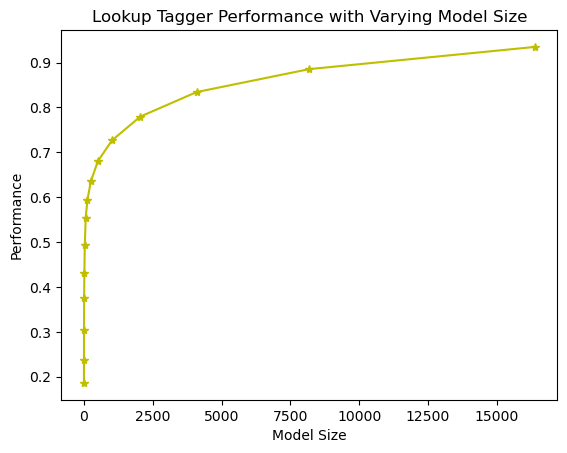

In [25]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-y*')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

display()

In [26]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
print(unigram_tagger.tag(brown_sents[2007]), sep=', ')

unigram_tagger.evaluate(brown_tagged_sents)

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'QL'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\851006094.py:7: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  unigram_tagger.evaluate(brown_tagged_sents)


0.9349006503968017

In [27]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [30]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\1988371040.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  unigram_tagger.evaluate(test_sents)


0.8121200039868434

In [31]:
bigram_tagger = nltk.BigramTagger(train_sents)
print(bigram_tagger.tag(brown_sents[2007]), sep=", ")

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


In [32]:
unseen_sent = brown_sents[4203]
print(bigram_tagger.tag(unseen_sent), sep=", ")

[('The', 'AT'), ('population', 'NN'), ('of', 'IN'), ('the', 'AT'), ('Congo', 'NP'), ('is', 'BEZ'), ('13.5', None), ('million', None), (',', None), ('divided', None), ('into', None), ('at', None), ('least', None), ('seven', None), ('major', None), ('``', None), ('culture', None), ('clusters', None), ("''", None), ('and', None), ('innumerable', None), ('tribes', None), ('speaking', None), ('400', None), ('separate', None), ('dialects', None), ('.', None)]


In [33]:
bigram_tagger.evaluate(test_sents)


C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\63762215.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  bigram_tagger.evaluate(test_sents)


0.10206319146815508

In [34]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\2463049084.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  t2.evaluate(test_sents)


0.8452108043456593

In [35]:
nltk.BigramTagger(sents, cutoff=2, backoff=t1)

TypeError: 'function' object is not iterable

In [36]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [37]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [41]:
text = """The board's action shows what free enterprise
is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

In [42]:
cfd = nltk.ConditionalFreqDist(
((x[1], y[1], z[0]), z[1])
for sent in brown_tagged_sents
for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

In [43]:
test_tags = [tag for sent in brown.sents(categories='editorial') for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [44]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\2577481485.py:9: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  t2.evaluate(test_sents)


0.8452108043456593

In [45]:
from nltk.tbl import demo as brill_tagger
brill_tagger.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8358
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

In [46]:
text = "They wind back the clock, while we chase after the wind."
tokens = text.split()
tagger.tag(tokens)

[('They', 'PPSS'),
 ('wind', 'VB'),
 ('back', 'RB'),
 ('the', 'AT'),
 ('clock,', 'NN'),
 ('while', 'CS'),
 ('we', 'PPSS'),
 ('chase', 'NN'),
 ('after', 'CS'),
 ('the', 'AT'),
 ('wind.', 'NN')]

3. Tokenize and tag the following sentence: They wind back the clock, while we chase after the wind. ** What different pronunciations and parts of speech are involved?**

In [47]:
sent = 'They wind back the clock, while we chase after the wind.'
nltk.pos_tag(nltk.word_tokenize(sent))

[('They', 'PRP'),
 ('wind', 'VBP'),
 ('back', 'RB'),
 ('the', 'DT'),
 ('clock', 'NN'),
 (',', ','),
 ('while', 'IN'),
 ('we', 'PRP'),
 ('chase', 'VBP'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('wind', 'NN'),
 ('.', '.')]

10. Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?

In [49]:
brown_tagged_sents = brown.tagged_sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

test_text = ['hello', 'world', 'natural', 'language', 'processing', 'semso']
unigram_tagger.tag(test_text)
# The words doesn't appear in the training text, and therefore 
#the tagger can't speculate the word's tag.



[('hello', None),
 ('world', 'NN'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('semso', None)]

14. Use sorted() ** and ** set() ** to get a sorted list of tags used in the Brown corpus, removing duplicates.**



In [50]:
list_of_tags = sorted(set([tag for (_, tag) in brown.tagged_words()]))

In [52]:
list_of_tags
# _ - underscore, it is used to intentionally ignore the value

["'",
 "''",
 '(',
 '(-HL',
 ')',
 ')-HL',
 '*',
 '*-HL',
 '*-NC',
 '*-TL',
 ',',
 ',-HL',
 ',-NC',
 ',-TL',
 '--',
 '---HL',
 '.',
 '.-HL',
 '.-NC',
 '.-TL',
 ':',
 ':-HL',
 ':-TL',
 'ABL',
 'ABN',
 'ABN-HL',
 'ABN-NC',
 'ABN-TL',
 'ABX',
 'AP',
 'AP$',
 'AP+AP-NC',
 'AP-HL',
 'AP-NC',
 'AP-TL',
 'AT',
 'AT-HL',
 'AT-NC',
 'AT-TL',
 'AT-TL-HL',
 'BE',
 'BE-HL',
 'BE-TL',
 'BED',
 'BED*',
 'BED-NC',
 'BEDZ',
 'BEDZ*',
 'BEDZ-HL',
 'BEDZ-NC',
 'BEG',
 'BEM',
 'BEM*',
 'BEM-NC',
 'BEN',
 'BEN-TL',
 'BER',
 'BER*',
 'BER*-NC',
 'BER-HL',
 'BER-NC',
 'BER-TL',
 'BEZ',
 'BEZ*',
 'BEZ-HL',
 'BEZ-NC',
 'BEZ-TL',
 'CC',
 'CC-HL',
 'CC-NC',
 'CC-TL',
 'CC-TL-HL',
 'CD',
 'CD$',
 'CD-HL',
 'CD-NC',
 'CD-TL',
 'CD-TL-HL',
 'CS',
 'CS-HL',
 'CS-NC',
 'CS-TL',
 'DO',
 'DO*',
 'DO*-HL',
 'DO+PPSS',
 'DO-HL',
 'DO-NC',
 'DO-TL',
 'DOD',
 'DOD*',
 'DOD*-TL',
 'DOD-NC',
 'DOZ',
 'DOZ*',
 'DOZ*-TL',
 'DOZ-HL',
 'DOZ-TL',
 'DT',
 'DT$',
 'DT+BEZ',
 'DT+BEZ-NC',
 'DT+MD',
 'DT-HL',
 'DT-NC',
 'DT-TL',
 'D

18. Generate some statistics for tagged data to answer the following questions:
a. What proportion of word types are always assigned the same part-of-speech tag?
b. How many words are ambiguous, in the sense that they appear with at least two tags?
c. What percentage of word tokens ** in the Brown Corpus involve these ambiguous words?**

In [53]:
brown_tag = brown.tagged_words(tagset = 'universal')
cfd = nltk.ConditionalFreqDist(brown_tag)

In [54]:
cfd

<ConditionalFreqDist with 56057 conditions>

In [55]:
proportion = sum(1 for word in cfd if len(cfd[word]) == 1) / len(cfd)

In [56]:
ambiguous = sum(1 for word in cfd if len(cfd[word]) > 1)

In [57]:
proportion

0.9358510087946198

In [58]:
ambiguous

3596

Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions: 
a. Produce an alphabetically sorted list of the distinct words tagged as MD. 
b. Identify words that can be plural nouns or third person singular verbs (e.g., deals, flies). 
c. Identify three-word prepositional phrases of the form IN + DET + NN (e.g., in the lab).
d. masculine proportion

In [69]:
from nltk.corpus import brown
import nltk

text = brown.words()
tagged_text = brown.tagged_words()
set_text = set(text)
cfd = nltk.ConditionalFreqDist(tagged_text)
conditions = cfd.conditions()

# # produces the alphabetically sorted list of distinct words tagged as MD.

md_words = [condition for condition in conditions if cfd[condition]['MD'] != 0]
md_words.sort()

print(md_words)

# # question two - 2. Identify words that can be plural nouns or third person singular verbs (e.g. deals, flies).

two_words = [condition for condition in conditions if cfd[condition]['NNS'] and cfd[condition]['VBZ']]
two_words.sort()
print(two_words)

# # question four

fd = nltk.FreqDist(text)
masc_fem_proportion = (fd['he'] + fd['He']) / (fd['she'] + fd['She'])
print(masc_fem_proportion)

# 3. Identify three-word prepositional phrases of the form IN + DET + NN (eg. in the lab).


#zip(*trigram): The zip function takes multiple iterables and returns an iterator that generates tuples containing elements 
#from the input iterables, paired together. In this case, the *trigram is a way of unpacking the contents of the trigram 
#iterable. 
#It assumes that trigram is a sequence of iterables, and the * operator unpacks them as separate arguments to zip.

# pulls out trigrams for the tagged text
tagged_text = brown.tagged_words()
trigrams = list(nltk.trigrams(tagged_text))
for trigram in trigrams:
	zipped_tag = [t for t in zip(*trigram)]
	if zipped_tag[1] == ('IN', 'DT', 'NN'):
		print(zipped_tag[0])

# note - this is the idea. but there must not be three word phrases of the sort that they are talking about. It works for other combinations but not for those three.

['Can', 'Could', 'May', 'Might', 'Must', 'Ought', 'Shall', 'Should', 'Will', 'Would', "c'n", 'can', 'colde', 'could', 'dare', 'kin', 'maht', 'mai', 'may', 'maye', 'mayst', 'might', 'must', 'need', 'ought', 'shall', 'should', 'shuld', 'shulde', 'wil', 'will', 'wilt', 'wod', 'wold', 'wolde', 'would']
['Aids', 'Designs', 'Increases', 'Makes', 'Reports', 'Says', 'accounts', 'acts', 'addresses', 'advances', 'affects', 'aids', 'aims', 'amounts', 'answers', 'appeals', 'approaches', 'arches', 'assaults', 'associates', 'attacks', 'attempts', 'attributes', 'backs', 'bangs', 'banks', 'bargains', 'bars', 'bases', 'bats', 'beats', 'bellows', 'belts', 'bends', 'benefits', 'bites', 'blankets', 'blots', 'blows', 'blueprints', 'boards', 'bodies', 'borders', 'bores', 'bottles', 'bows', 'breaks', 'bridges', 'bristles', 'bubbles', 'bugs', 'bulletins', 'bullies', 'burns', 'butts', 'calls', 'caps', 'captures', 'cares', 'casts', 'catches', 'causes', 'censors', 'centers', 'challenges', 'champions', 'changes',

('for', 'each', 'aspect')
('below', 'that', 'line')
('at', 'this', 'conclusion')
('above', 'that', 'line')
('In', 'each', 'case')
('in', 'each', 'area')
('After', 'this', 'holocaust')
('at', 'this', 'point')
('At', 'this', 'date')
('On', 'that', 'date')
('of', 'this', 'background')
('with', 'this', 'motif')
('From', 'this', 'point')
('of', 'this', 'tissue')
('for', 'this', 'reason')
('about', 'this', 'system')
('in', 'this', 'area')
('In', 'this', 'article')
('of', 'each', 'heartbeat')
('by', 'this', 'technique')
('for', 'this', 'procedure')
('of', 'this', 'technique')
('after', 'each', 'burst')
('of', 'this', 'method')
('on', 'this', 'phenomenon')
('in', 'another', 'flight')
('on', 'this', 'visit')
('of', 'this', 'expedition')
('At', 'this', 'lecture')
('of', 'this', 'drug')
('of', 'this', 'drug')
('by', 'this', 'type')
('against', 'this', 'opinion')
('on', 'this', 'subject')
('in', 'that', 'fairy-land')
('in', 'this', 'work')
('in', 'this', 'case')
('of', 'that', 'day')
('for', 'this

('in', 'this', 'parliament')
('of', 'this', 'monei')
('of', 'this', 'towne')
('against', 'this', 'background')
('by', 'this', 'observation')
('in', 'this', 'world')
('of', 'that', 'night')
('of', 'this', 'trip')
('for', 'that', 'year')
('in', 'that', 'year')
('from', 'that', 'college')
('of', 'that', 'year')
('of', 'that', 'weapon')
('of', 'that', 'day')
('from', 'this', 'prolusion')
('in', 'this', 'performance')
('of', 'this', 'development')
('of', 'this', 'class')
('in', 'this', 'respect')
('of', 'this', 'phenomenon')
('in', 'this', 'case')
('in', 'this', 'area')
('in', 'this', 'profession')
('in', 'this', 'situation')
('of', 'that', 'truth')
('from', 'this', 'day')
('of', 'this', 'department')
('With', 'this', 'excuse')
('with', 'this', 'mixture')
('by', 'this', 'object')
('at', 'that', 'time')
('From', 'this', 'point')
('to', 'this', 'effect')
('with', 'this', 'machinery')
('of', 'this', 'book')
('In', 'this', 'respect')
('of', 'this', 'poetry')
('of', 'this', 'anger')
('throughout

('to', 'this', 'condition')
('against', 'this', 'bent')
('to', 'this', 'valley')
('on', 'that', 'day')
('In', 'this', 'country')
('in', 'this', 'country')
('about', 'that', 'fire')
('with', 'this', 'kind')
('for', 'that', 'day')
('in', 'that', 'place')
('at', 'this', 'point')
('about', 'this', 'neighborhood')
('To', 'this', 'effect')
('within', 'this', 'prison')
('to', 'this', 'land')
('to', 'that', 'belief')
('in', 'this', 'country')
('by', 'that', 'rattlesnake')
('with', 'this', 'self-satisfaction')
('on', 'this', 'permit')
('of', 'that', 'pistol')
('to', 'this', 'small-town')
('of', 'that', 'creek')
('of', 'that', 'room')
('in', 'that', 'fella')
('in', 'this', 'state')
('in', 'this', 'town')
('on', 'this', 'journey')
('in', 'this', 'wilderness')
('on', 'this', 'side')
('at', 'this', 'hour')
('for', 'that', 'money')
('Over', 'this', 'way')
('under', 'each', 'wing')
('under', 'this', 'stuff')
('in', 'this', 'canyon')
('near', 'that', 'spot')
('off', 'another', 'crew')
('by', 'that', '

6. There are 264 distinct words in the Brown Corpus having exactly three possible tags. 
a. Print a table with the integers 1..10 in one column, and the number of distinct words in the corpus having 1..10 distinct tags in the other column. 
b. For the word with the greatest number of distinct tags, print out sentences from the corpus containing the word, one for each possible tag


In [71]:
from tabulate import tabulate
tags = brown.tagged_words()
cfd = nltk.ConditionalFreqDist(tags)

num_tags = []
for condition in cfd.conditions():
    num_tags.append((condition, len(cfd[condition])))

tags_by_num = []

for i in range(11):
    this_num = 0
    for (word, num) in num_tags:
        if num == i:
            this_num += 1
    tags_by_num.append((i, this_num))

# prints a table of the integers 1-10 and the numbers of distinct words in the corpus that have those numbers of distinct tags

print(tabulate(tags_by_num))

# "that" is the word with the most distinct tags.
distinct_tags = [tag for tag in cfd['that']]

tagged_sents = brown.tagged_sents()

# go through each sentence in the corpus. 
# go through each tag in the sentence

for sent in tagged_sents:
    for (word, tag) in sent:
        for distinct_tag in distinct_tags:
            if distinct_tag == tag and (word == 'That' or word == 'that'):
                print(sent)
                distinct_tags.remove(distinct_tag)
                print("************")
                break

--  -----
 0      0
 1  47328
 2   7186
 3   1146
 4    265
 5     87
 6     27
 7     12
 8      1
 9      1
10      2
--  -----
[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]
************
[('Regarding', 'IN'), ("Atlanta's", 'NP$'), ('new', 'JJ'), ('multi-million-dollar', 'JJ'), ('airport', 'NN'), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('recommended', 'VBD'), ('``', '``'), ('that', 'CS'), ('when', 'WRB'), ('the', 'AT'), ('new', 'JJ'), ('management', 'NN'), ('takes', 'VBZ'), ('charge', 'NN'), ('Jan.', 'NP'), ('1', 'CD'), ('the', 'AT'), ('airport', 'NN'), ('be', 'BE'), ('operated', 'VB

In [72]:
# ★ Create a regular expression tagger and various unigram and n-gram taggers, incorporating backoff, and train them on part of the Brown corpus.
# Create three different combinations of the taggers. Test the accuracy of each combined tagger. Which combination works best?

# the best combination is the kind that moves from most specific to most general. So the default tagger and the regex tagger are the last backoff.

# Try varying the size of the training corpus. How does it affect your results?

import nltk
from nltk.corpus import brown

# getting the data ready

tagged_sents = brown.tagged_sents(categories='news')

size = int(len(tagged_sents) * 0.99)
train_sents = tagged_sents[:size]
test_sents = tagged_sents[size:]


patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
     ]


t0 = nltk.DefaultTagger('NN')
tr = nltk.RegexpTagger(patterns, backoff=t0)
t1 = nltk.UnigramTagger(train_sents, backoff=tr)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
print(t2.evaluate(test_sents))

0.8946428571428572


C:\Users\Anes\AppData\Local\Temp\ipykernel_33272\1247405412.py:36: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(t2.evaluate(test_sents))
